# Clustering K-Means nel Machine Learning

Questo notebook esplora il clustering K-Means, includendo la teoria, le formule matematiche e implementazioni in Python.

In [2]:
# Importazione delle librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## Teoria del K-Means

Il clustering K-Means è un algoritmo iterativo che assegna n punti a k cluster basati sulla minimizzazione della varianza intra-cluster.

### Formula matematica
Dato un insieme di punti $ X = \{x_1, x_2, ..., x_n\} $, l'algoritmo cerca di minimizzare la somma delle distanze quadratiche dai centroidi:

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

dove:
- $ C_i $ è il cluster i-esimo
- $ \mu_i $ è il centroide del cluster $ C_i $

L'algoritmo segue questi passi:
1. Selezionare casualmente k centroidi iniziali.
2. Assegnare ciascun punto al cluster il cui centroide è il più vicino.
3. Ricalcolare i centroidi come la media dei punti assegnati.
4. Ripetere i passi 2 e 3 fino alla convergenza.

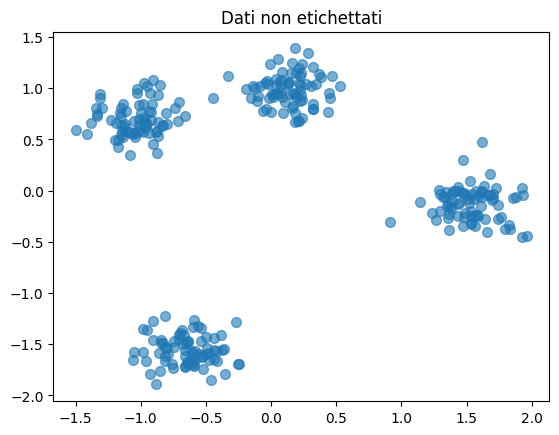

In [3]:
# Generazione di dati sintetici
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
X = StandardScaler().fit_transform(X)

# Visualizzazione dei dati grezzi
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6)
plt.title("Dati non etichettati")
plt.show()

## Implementazione di K-Means in Python

Utilizziamo `sklearn.cluster.KMeans` per applicare l'algoritmo ai dati generati.

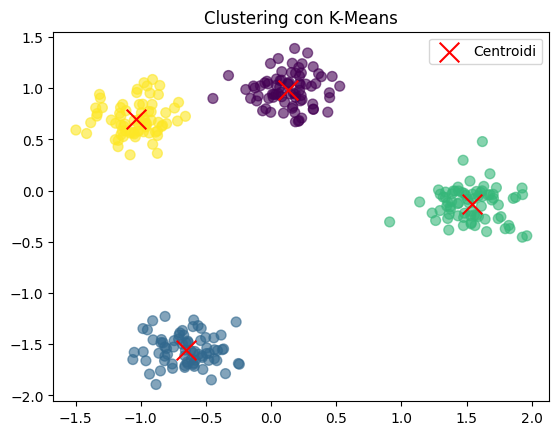

In [6]:
# Applicazione dell'algoritmo K-Means
k = 4  # Numero di cluster
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizzazione dei cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroidi')
plt.title("Clustering con K-Means")
plt.legend()
plt.show()

## Selezione del Numero Ottimale di Cluster

Utilizziamo il **Metodo del Gomito** per determinare il valore ottimale di k.

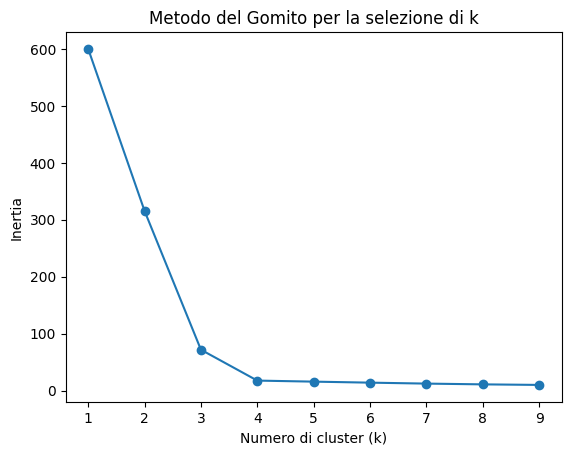

In [5]:
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualizzazione del metodo del gomito
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Numero di cluster (k)")
plt.ylabel("Inertia")
plt.title("Metodo del Gomito per la selezione di k")
plt.show()

## Conclusione

K-Means è un algoritmo potente per il clustering, ma è sensibile alla scelta di k e ai dati iniziali. Il metodo del gomito aiuta nella selezione del numero ottimale di cluster.